In [1]:
##Clear the environment
rm(list=ls())

##Turn off scientific notations for numbers
options(scipen = 999)  

##Set locale
Sys.setlocale("LC_ALL", "English") 

##Set seed for reproducibility
set.seed(2345)

# Turn off warnings
options(warn = -1)

getstats <- function(cm){
  # Sensititvity a.k.a TPR
  tpr <-cm[2,2]/(cm[2,2]+cm[2,1])
  fpr <-cm[1,2]/(cm[1,2]+cm[1,1])
  
  # Specificity a.k.a. TNR
  tnr <- cm[1,1]/(cm[1,1]+cm[1,2])
  fnr <- cm[2,1]/(cm[2,1]+cm[2,2])
  
  # Calculate accuracy
  acc <-(cm[2,2]+cm[1,1])/sum(cm)
  err <-(cm[1,2]+cm[2,1])/sum(cm)
  
  #Precision - Positive Predictive Value
  ppv <- cm[2,2]/(cm[2,2]+cm[1,2])
  
  # Negative Predictive Value
  npv <- cm[1,1]/(cm[1,1]+cm[2,1])
  
  rbind(TruePos_Sensitivity=tpr, FalsePos=fpr, TrueNeg_Specificty=tnr, FalseNeg=fnr, PositivePredictiveValue=ppv, NegativePredictiveValue=npv, Accuracy = acc, Error = err)
}

# clean the data names and data
# Use: df<-cleanit(df)
cleanit <-function(df){
  names(df) <-tolower(names(df))
  names(df) <- gsub("\\(","",names(df))
  names(df) <- gsub("\\)","",names(df))
  names(df) <- gsub("\\.","",names(df))
  names(df) <- gsub("_","",names(df))
  names(df) <- gsub("-","",names(df))
  names(df) <- gsub(",","",names(df))
  return(df)
}

[1] "LC_COLLATE=English_United States.1252;LC_CTYPE=English_United States.1252;LC_MONETARY=English_United States.1252;LC_NUMERIC=C;LC_TIME=English_United States.1252"

In [3]:
#Load the data and view it to determine ind and dep variables
#file<-"D:/Data/TrainExer13.csv"
#file <-"D:/Data/SalesPrice.csv"
file<-"D:/Data/TrainExer21.csv"

df=read.csv(file)

str(df)
df<-cleanit(df)
str(df)

# count blanks remove blanks
#barplot(colSums(!is.na(df)))
colSums(!is.na(df)) ## Count blanks
#df <- na.omit(df) ## THis will remove blanks

'data.frame':	500 obs. of  7 variables:
 $ Observation: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Wage       : int  66 34 70 47 107 188 123 57 42 200 ...
 $ LogWage    : num  4.19 3.53 4.25 3.85 4.67 ...
 $ Female     : int  0 1 1 0 1 1 1 1 1 0 ...
 $ Age        : int  49 42 42 38 54 54 47 39 25 59 ...
 $ Educ       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Parttime   : int  1 1 1 0 1 0 0 1 0 0 ...
'data.frame':	500 obs. of  7 variables:
 $ observation: int  1 2 3 4 5 6 7 8 9 10 ...
 $ wage       : int  66 34 70 47 107 188 123 57 42 200 ...
 $ logwage    : num  4.19 3.53 4.25 3.85 4.67 ...
 $ female     : int  0 1 1 0 1 1 1 1 1 0 ...
 $ age        : int  49 42 42 38 54 54 47 39 25 59 ...
 $ educ       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ parttime   : int  1 1 1 0 1 0 0 1 0 0 ...


observation        wage     logwage      female         age        educ 
        500         500         500         500         500         500 
   parttime 
        500

In [55]:
#Set dep and indep vars
df$ind<-df$educ
df$dep<-df$wage
df$logdep<-log(df$dep) # We can use log to give a relative comparision (% more or less each ind var has on dep var)

# Dep and Independent Vars define columns we will be working with
depvar <- 'wage'
indepvars<- c('educ','age','female','parttime')
#indepvars <-c('.') #Use this line to use all other variables
exclude <- c() # numerical variables to exclude from using all
f1 <- paste(depvar,paste(indepvars,collapse=' + '),sep=' ~ ')
f2 <- paste(f1,paste(exclude,collapse=' - '),sep=' - ')

# Dep and Independent Vars define columns we will be working with
logdepvar <- 'logdep'
#indepvars <-c('.') #Use this line to use all other variables
exclude <- c() # numerical variables to exclude from using all
f3 <- paste(logdepvar,paste(indepvars,collapse=' + '),sep=' ~ ')
f4 <- paste(f3,paste(exclude,collapse=' - '),sep=' - ')

#View summary 
summary(cbind(indep=df$ind,dep=df$dep,logdep=df$logdep))

     indep            dep            logdep     
 Min.   :1.000   Min.   : 32.0   Min.   :3.466  
 1st Qu.:1.000   1st Qu.: 72.0   1st Qu.:4.277  
 Median :2.000   Median :100.0   Median :4.605  
 Mean   :2.078   Mean   :114.9   Mean   :4.641  
 3rd Qu.:3.000   3rd Qu.:144.0   3rd Qu.:4.970  
 Max.   :4.000   Max.   :384.0   Max.   :5.951  

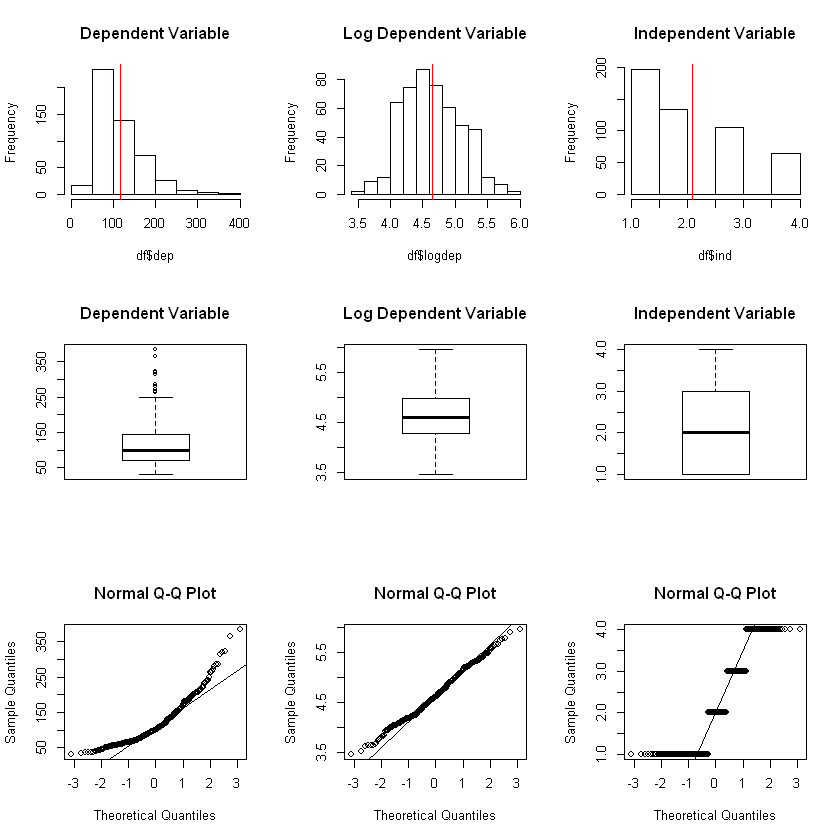

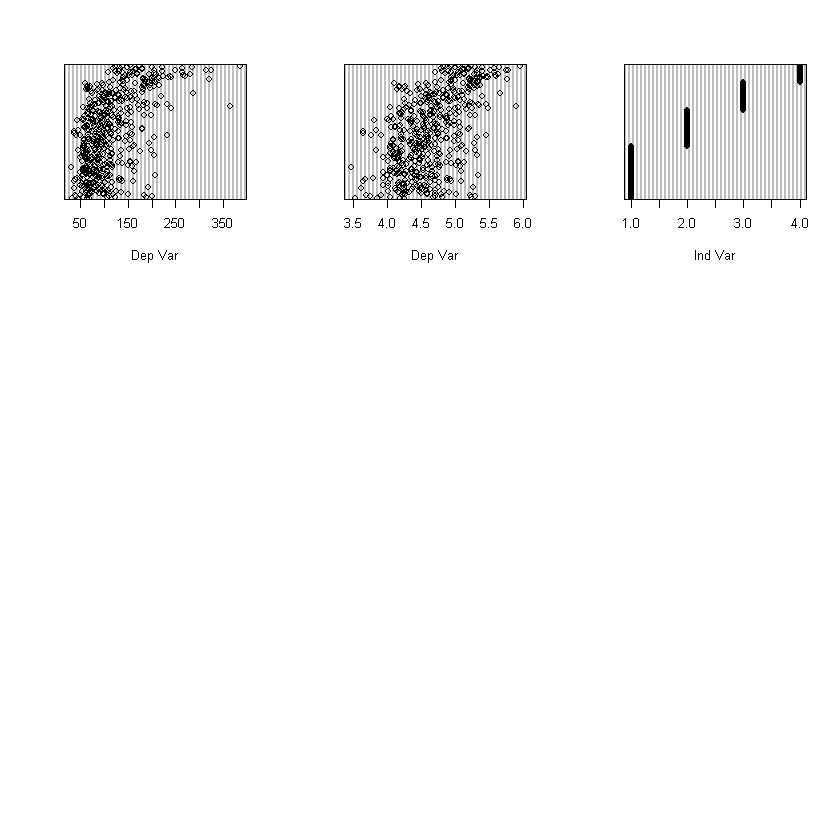

In [95]:
par(mfrow=c(3,3))
hist(df$dep, main="Dependent Variable")
abline(v=mean(df$dep),col="red")

hist(df$logdep, main="Log Dependent Variable")
abline(v=mean(df$logdep),col="red")

hist(df$ind,main="Independent Variable")
abline(v=mean(df$ind),col="red")

boxplot(df$dep, main="Dependent Variable")
boxplot(df$logdep, main="Log Dependent Variable")
boxplot(df$ind, main="Independent Variable")

qqnorm(df$dep); qqline(df$dep)
qqnorm(df$logdep); qqline(df$logdep)
qqnorm(df$ind); qqline(df$ind)

dotchart(df$dep, xlab="Dep Var")
dotchart(df$logdep, xlab="Dep Var")
dotchart(df$ind, xlab="Ind Var")

In [46]:
##Remove outlier from dep var
#out<-boxplot.stats(df$dep)$out
#df<-subset(df,df$dep<out)

#View summary of
summary(cbind(indep=df$ind,dep=df$dep,logdep=df$logdep))

     indep            dep            logdep     
 Min.   :1.000   Min.   : 32.0   Min.   :3.466  
 1st Qu.:1.000   1st Qu.: 72.0   1st Qu.:4.277  
 Median :2.000   Median :100.0   Median :4.605  
 Mean   :2.078   Mean   :114.9   Mean   :4.641  
 3rd Qu.:3.000   3rd Qu.:144.0   3rd Qu.:4.970  
 Max.   :4.000   Max.   :384.0   Max.   :5.951  

indep       dep    logdep
indep  1.0000000 0.5832267 0.5737736
dep    0.5832267 1.0000000 0.9605781
logdep 0.5737736 0.9605781 1.0000000

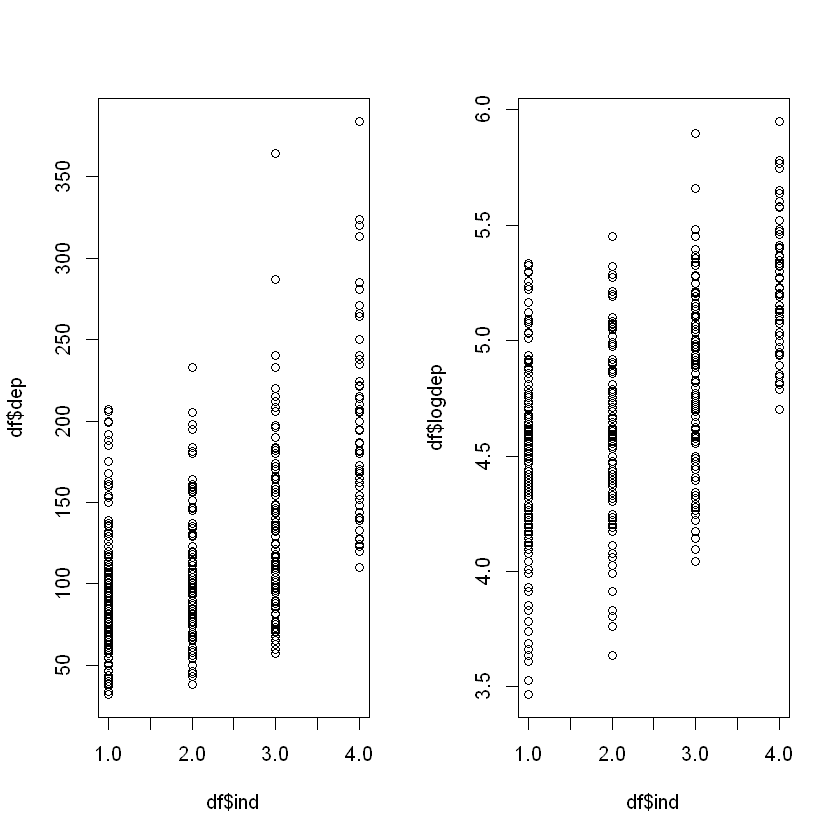

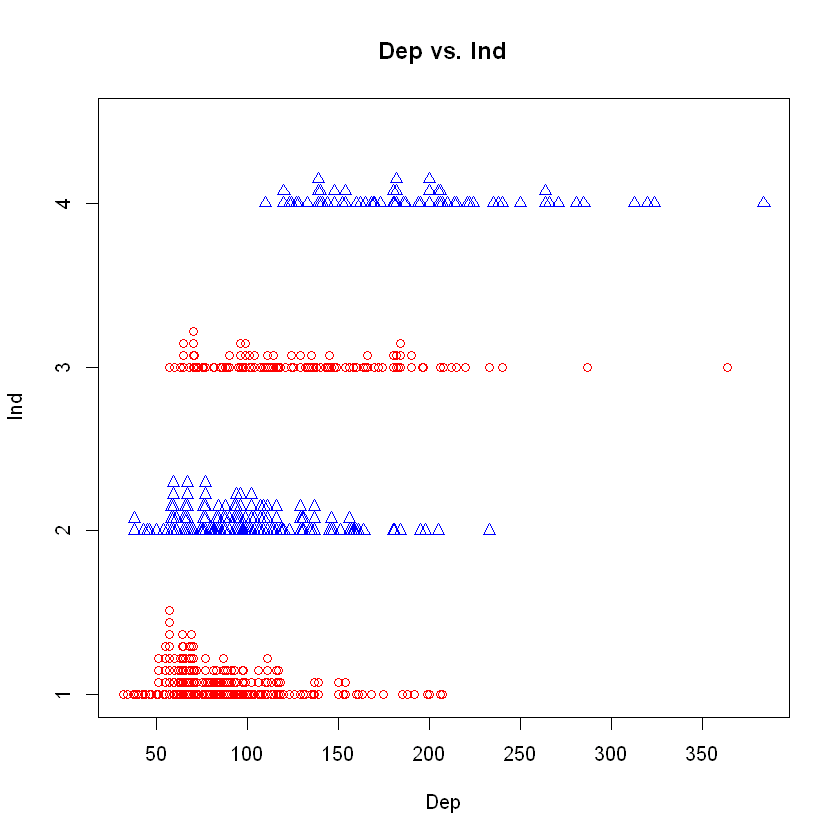

In [47]:
#Correlation coeff 
cor(cbind(indep=df$ind,dep=df$dep, logdep=df$logdep))

par(mfrow=c(1,2))

#Scatter Plot
#png(filename="D:/Data/scatter.png")
plot(df$ind,df$dep)
plot(df$ind,df$logdep)
#dev.off()

par(mfrow=c(1,1))
stripchart(df$dep~df$ind,method="stack", pch=c(1,2), col=c("red","blue"), xlab="Dep", ylab="Ind", main="Dep vs. Ind",offset=0.5)

Warning message:
In par(fig = c(0, 0.8, 0, 0.8), new = TRUE): calling par(new=TRUE) with no plot

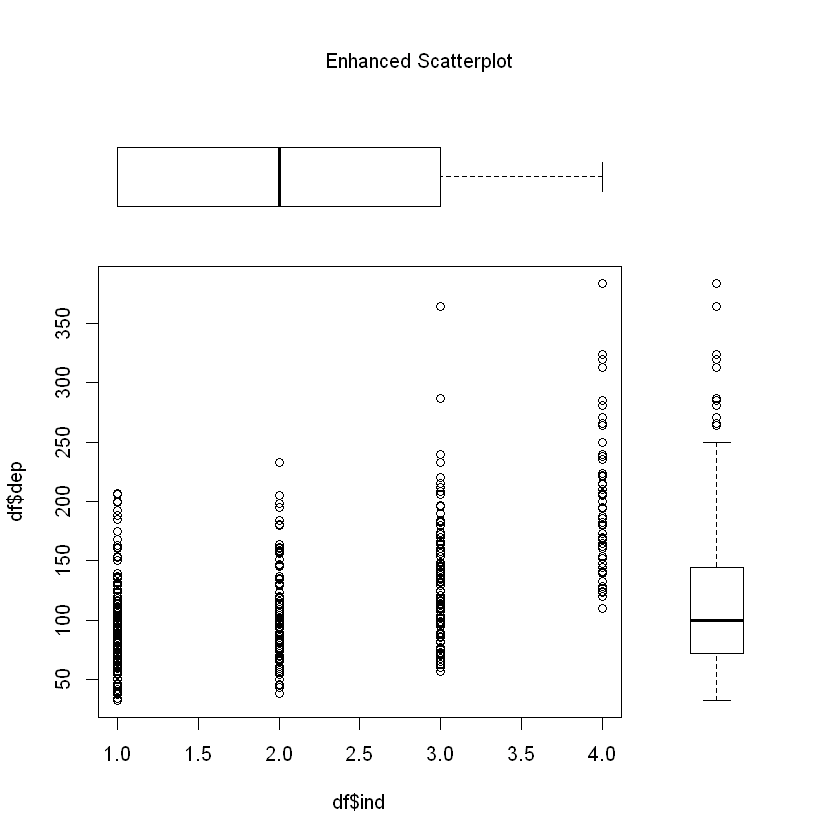

In [48]:
#Enhanced Scatter plot
# Add boxplots to a scatterplot
par(fig=c(0,0.8,0,0.8), new=TRUE)
plot(df$ind, df$dep)
#X Variable
par(fig=c(0,0.8,0.55,1), new=TRUE)
boxplot(df$ind, horizontal=TRUE, axes=FALSE)
# Y Variable
par(fig=c(0.65,1,0,0.8),new=TRUE)
boxplot(df$dep, axes=FALSE)
mtext("Enhanced Scatterplot", side=3, outer=TRUE, line=-3)

In [56]:
f3

[1] "logdep ~ educ + age + female + parttime"

In [57]:
simpreg=lm(f1,data=df)
logreg=lm(f3,data=df)

In [58]:
simpregsum<-summary(simpreg)
simpregsum


Call:
lm(formula = f1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.493 -20.703  -2.405  15.483 166.744 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept) -77.8655     7.0571 -11.034 <0.0000000000000002 ***
educ         29.4735     1.3596  21.679 <0.0000000000000002 ***
age           3.6169     0.1624  22.277 <0.0000000000000002 ***
female       -2.1208     3.1515  -0.673               0.501    
parttime    -43.0976     4.0264 -10.704 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 31.28 on 495 degrees of freedom
Multiple R-squared:  0.681,	Adjusted R-squared:  0.6784 
F-statistic: 264.2 on 4 and 495 DF,  p-value: < 0.00000000000000022


In [59]:
logregsum<-summary(logreg)
logregsum


Call:
lm(formula = f3, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73843 -0.15752 -0.00406  0.16491  0.77868 

Coefficients:
             Estimate Std. Error t value            Pr(>|t|)    
(Intercept)  3.052685   0.055334  55.168 <0.0000000000000002 ***
educ         0.233178   0.010660  21.874 <0.0000000000000002 ***
age          0.030606   0.001273  24.041 <0.0000000000000002 ***
female      -0.041101   0.024711  -1.663              0.0969 .  
parttime    -0.365449   0.031571 -11.576 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2452 on 495 degrees of freedom
Multiple R-squared:  0.704,	Adjusted R-squared:  0.7016 
F-statistic: 294.3 on 4 and 495 DF,  p-value: < 0.00000000000000022


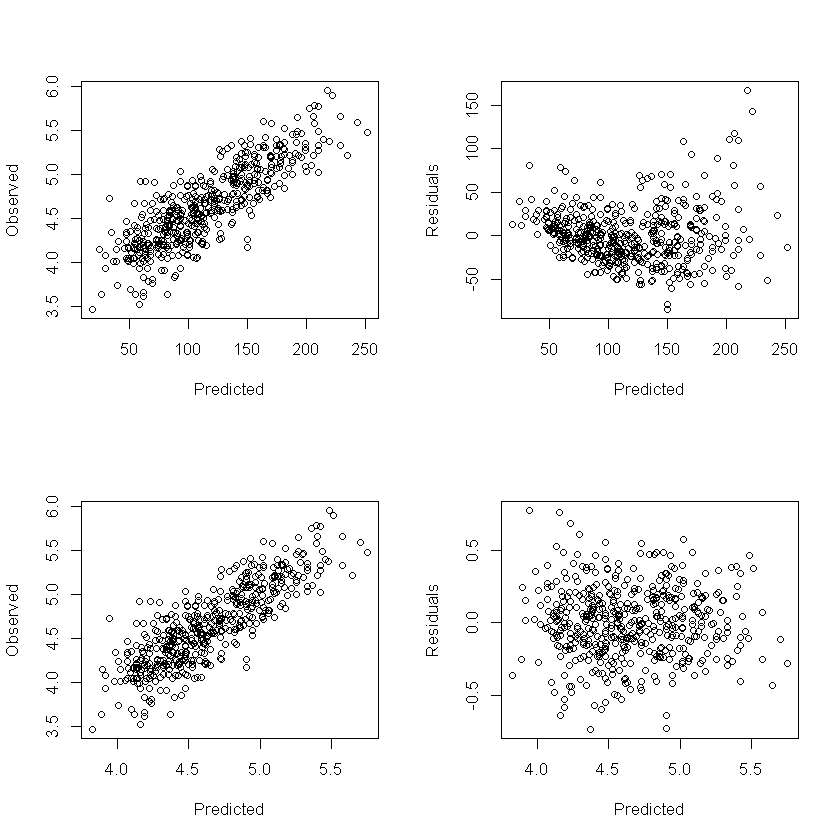

In [84]:
# Residual Plots
par(mfrow=c(2,2))

#Combine into a single object for plot
plotdf<- data.frame(Predicted = fitted(simpreg),Observed = df$logdep)
#head(plotdf)
plot(plotdf)

plotdf<- data.frame(Predicted = fitted(simpreg),Residuals = residuals(simpreg))
#head(plotdf)
plot(plotdf)


#Combine into a single object for plot
plotdf<- data.frame(Predicted = fitted(logreg),Observed = df$logdep)
#head(plotdf)
plot(plotdf)

plotdf<- data.frame(Predicted = fitted(logreg),Residuals = residuals(logreg))
#head(plotdf)
plot(plotdf)

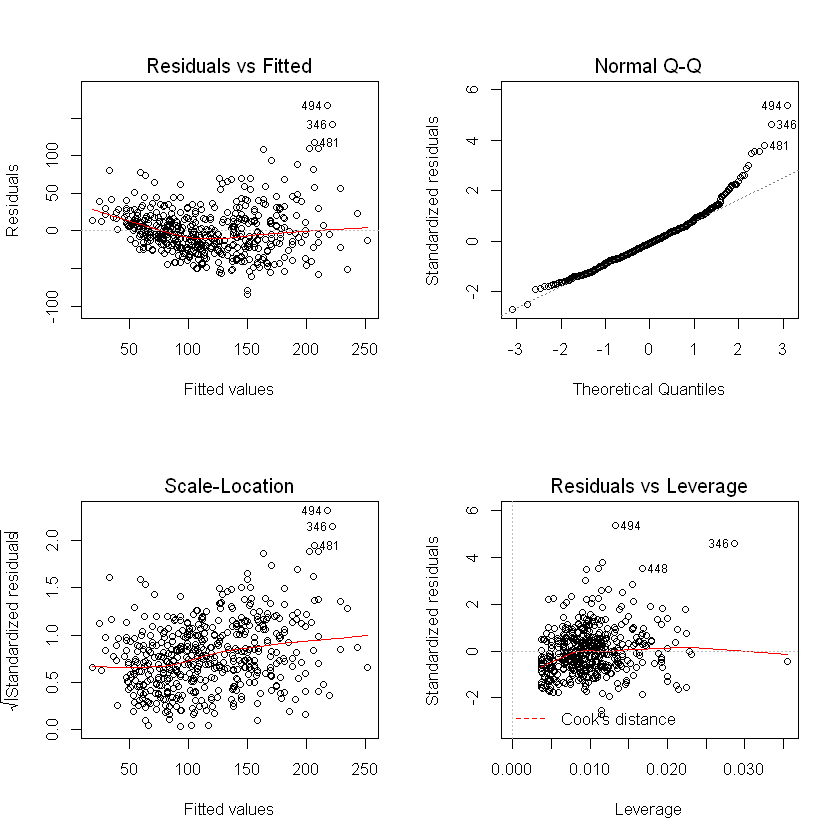

In [93]:
# Residual Plots
par(mfrow=c(2,2))
plot(simpreg)

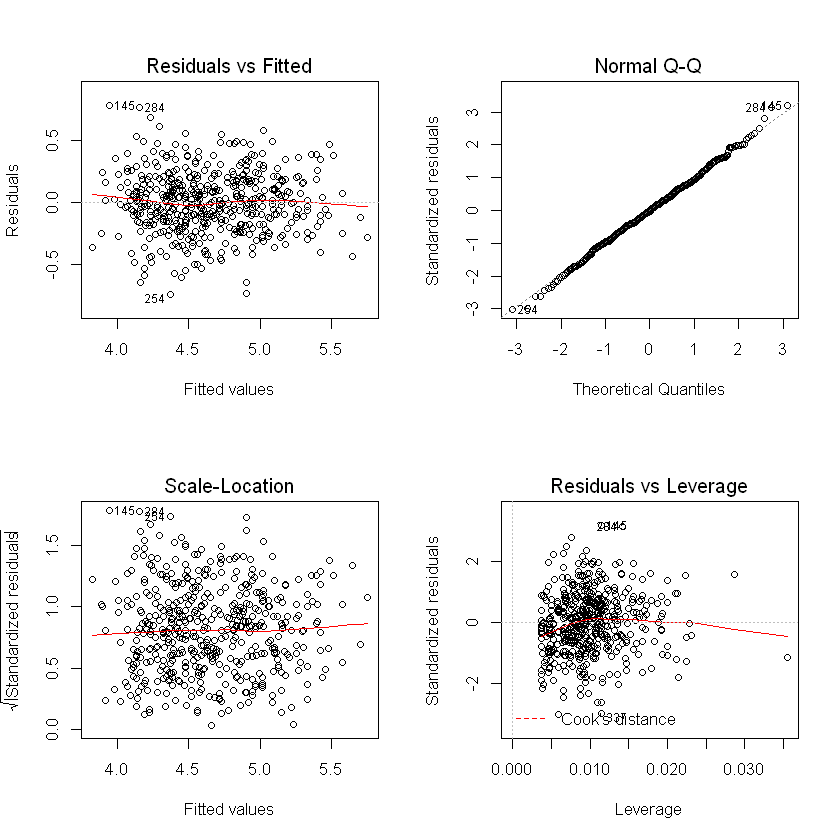

In [94]:
# Residual Plots
par(mfrow=c(2,2))
plot(logreg)

In [77]:
anova(simpreg)
anova(logreg)

Analysis of Variance Table

Response: wage
           Df Sum Sq Mean Sq F value                Pr(>F)    
educ        1 516371  516371 527.868 < 0.00000000000000022 ***
age         1 386168  386168 394.766 < 0.00000000000000022 ***
female      1  19220   19220  19.648            0.00001148 ***
parttime    1 112076  112076 114.572 < 0.00000000000000022 ***
Residuals 495 484218     978                                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Analysis of Variance Table

Response: logdep
           Df Sum Sq Mean Sq F value                Pr(>F)    
educ        1 33.108  33.108 550.502 < 0.00000000000000022 ***
age         1 27.617  27.617 459.208 < 0.00000000000000022 ***
female      1  2.012   2.012  33.455         0.00000001294 ***
parttime    1  8.059   8.059 133.995 < 0.00000000000000022 ***
Residuals 495 29.770   0.060                                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [88]:
## Get the coefficents and the 95% confidence intervals
print ("Coefficents and the 95% confidence intervals")
cbind(simpreg$coeff,confint(simpreg))

# CIs using standard errors
print ("Coefficents and the 95% confidence intervals Using Standard Error")
cbind(simpreg$coeff,confint.default(simpreg))

[1] "Coefficents and the 95% confidence intervals"


2.5 %     97.5 %
(Intercept) -77.865548 -91.731041 -64.000055
educ         29.473458  26.802255  32.144660
age           3.616902   3.297896   3.935909
female       -2.120791  -8.312728   4.071147
parttime    -43.097585 -51.008480 -35.186690

[1] "Coefficents and the 95% confidence intervals Using Standard Error"


2.5 %     97.5 %
(Intercept) -77.865548 -91.697139 -64.033957
educ         29.473458  26.808786  32.138129
age           3.616902   3.298676   3.935129
female       -2.120791  -8.297588   4.056007
parttime    -43.097585 -50.989137 -35.206033

In [92]:
## Get the coefficents and the 95% confidence intervals
print ("Coefficents and the 95% confidence intervals")
cbind(logreg$coeff,confint(logreg))

# CIs using standard errors
print ("Coefficents and the 95% confidence intervals Using Standard Error")
cbind(logreg$coeff,confint.default(logreg))

[1] "Coefficents and the 95% confidence intervals"


2.5 %       97.5 %
(Intercept)  3.05268522  2.94396683  3.161403611
educ         0.23317822  0.21223350  0.254122939
age          0.03060617  0.02810486  0.033107478
female      -0.04110102 -0.08965159  0.007449541
parttime    -0.36544893 -0.42747773 -0.303420143

[1] "Coefficents and the 95% confidence intervals Using Standard Error"


2.5 %       97.5 %
(Intercept)  3.05268522  2.94423265  3.161137786
educ         0.23317822  0.21228471  0.254071728
age          0.03060617  0.02811097  0.033101362
female      -0.04110102 -0.08953288  0.007330831
parttime    -0.36544893 -0.42732606 -0.303571808

In [118]:
# When using LogDep interpret coefficients as percentages
round((exp(coef(logreg))-1)*100,3)

(Intercept)        educ         age      female    parttime 
   2017.212      26.261       3.108      -4.027     -30.611

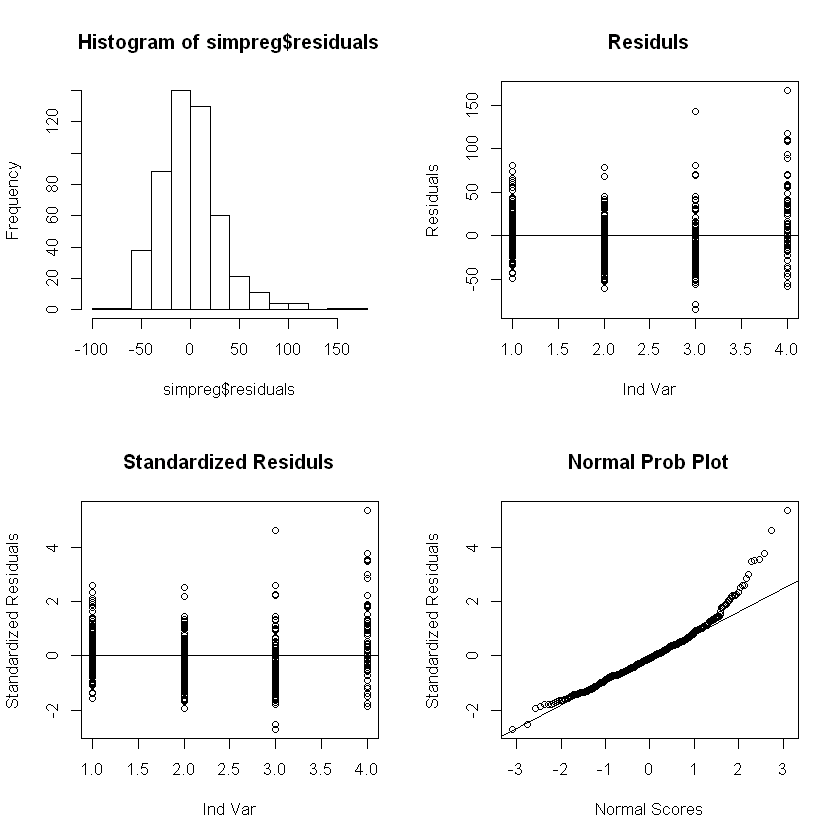

In [60]:
# Residual Plots
par(mfrow=c(2,2))

#png(filename="D:/Data/hist.png")
hist(simpreg$residuals)
#dev.off()

# Residuals
simpreg.res = resid(simpreg)
plot(df$ind, simpreg.res, ylab="Residuals", xlab="Ind Var", main="Residuls") 
abline(0, 0)

# Residuals
simpreg.stdres = rstandard(simpreg)
plot(df$ind, simpreg.stdres, ylab="Standardized Residuals", xlab="Ind Var", main="Standardized Residuls") 
abline(0, 0)

# Normal plot
qqnorm(simpreg.stdres,ylab="Standardized Residuals", xlab="Normal Scores", main="Normal Prob Plot") 
qqline(simpreg.stdres)

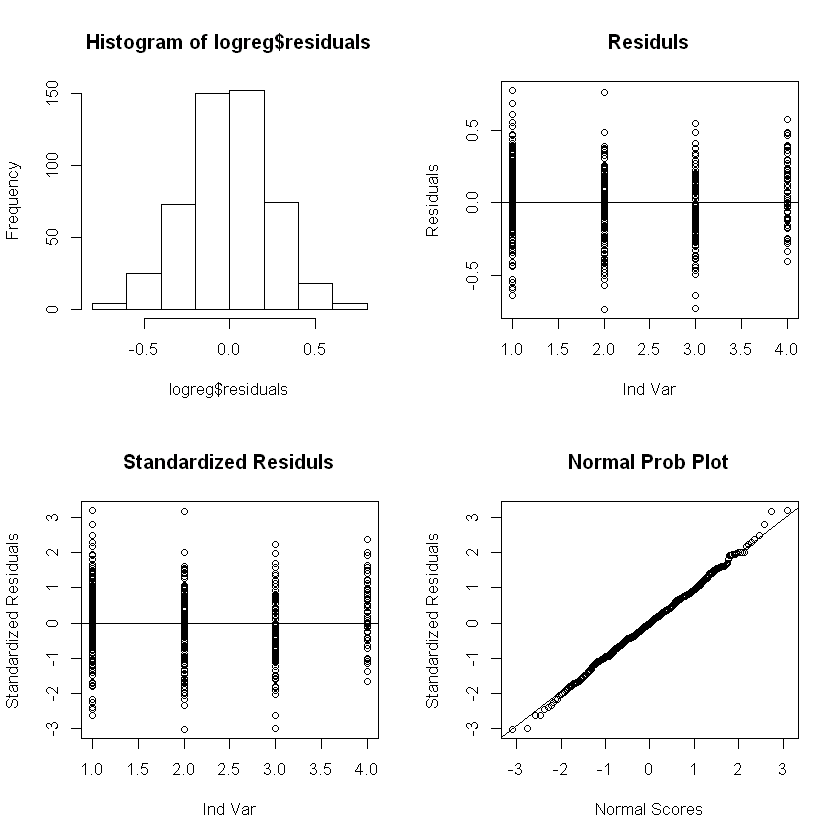

In [61]:
# Residual Plots Log Reg
par(mfrow=c(2,2))

hist(logreg$residuals)
# Residuals
logreg.res = resid(logreg)
plot(df$ind, logreg.res, ylab="Residuals", xlab="Ind Var", main="Residuls") 
abline(0, 0)

# Residuals
logreg.stdres = rstandard(logreg)
plot(df$ind, logreg.stdres, ylab="Standardized Residuals", xlab="Ind Var", main="Standardized Residuls") 
abline(0, 0)

# Normal plot
qqnorm(logreg.stdres,ylab="Standardized Residuals", xlab="Normal Scores", main="Normal Prob Plot") 
qqline(logreg.stdres)

##PREDICTIONS

In [125]:
#Predict with 95% confid intervals
new<-data.frame(ind=c(20:30))

#Generate Intervales
pred.conf <-predict(simpreg,new,interval = "confidence")
pred.pred <-predict(simpreg,new,interval = "prediction")
rbind(pred.conf,pred.pred)

#95% confident of prediction of 
cbind(confint.default(simpreg)[1,1]/2 - simpregsum$sigma, confint.default(simpreg)[1,2]/2 + simpregsum$sigma)

fit        lwr      upr
1  23.13539 13.3433582 32.92743
2  22.81082 12.0898156 33.53182
3  22.48624 10.8305595 34.14193
4  22.16167  9.5668619 34.75648
5  21.83709  8.2996472 35.37454
6  21.51252  7.0296020 35.99544
7  21.18794  5.7572467 36.61864
8  20.86337  4.4829822 37.24376
9  20.53879  3.2071224 37.87047
10 20.21422  1.9299163 38.49852
11 19.88964  0.6515638 39.12773
1  23.13539  7.4433558 38.82743
2  22.81082  6.5229090 39.09873
3  22.48624  5.5684699 39.40402
4  22.16167  4.5836923 39.73965
5  21.83709  3.5718657 40.10232
6  21.51252  2.5359286 40.48911
7  21.18794  1.4784915 40.89740
8  20.86337  0.4018645 41.32487
9  20.53879 -0.6919134 41.76950
10 20.21422 -1.8010444 42.22948
11 19.88964 -2.9239446 42.70323

[,1]     [,2]
[1,] 4.193163 25.43373

In [126]:
#If used log for dependent variable
#Generate Intervals Need to take exp 
predlog.conf <-predict(logreg,new,interval = "confidence")
predlog.pred <-predict(logreg,new,interval = "prediction")
exp(rbind(predlog.conf,predlog.pred))

fit      lwr      upr
1  24.65945 18.56975 32.74617
2  24.53631 17.98648 33.47126
3  24.41378 17.41865 34.21808
4  24.29187 16.86657 34.98606
5  24.17056 16.33033 35.77492
6  24.04986 15.80984 36.58456
7  23.92977 15.30491 37.41503
8  23.81027 14.81529 38.26648
9  23.69137 14.34067 39.13910
10 23.57307 13.88072 40.03319
11 23.45535 13.43507 40.94905
1  24.65945 15.65266 38.84888
2  24.53631 15.30800 39.32783
3  24.41378 14.95619 39.85191
4  24.29187 14.59963 40.41847
5  24.17056 14.24041 41.02522
6  24.04986 13.88034 41.67016
7  23.92977 13.52094 42.35162
8  23.81027 13.16354 43.06814
9  23.69137 12.80921 43.81856
10 23.57307 12.45888 44.60187
11 23.45535 12.11330 45.41730

In [87]:
plot(pred.pred[,1])
lines(new[,1], pred.pred[,2], lty=2, col="green")
lines(new[,1], pred.pred[,3], lty=2, col="green")
lines(new[,1], pred.conf[,2], lty=2, col="blue")
lines(new[,1], pred.conf[,3], lty=2, col="blue")
abline(h=mean(pred.pred[,1]),col="red")
abline(v=mean(new[,1]),col="red")

ERROR: Error in plot(pred.pred[, 1]): object 'pred.pred' not found


ERROR: Error in new[, 1]: object of type 'closure' is not subsettable


ERROR: Error in new[, 1]: object of type 'closure' is not subsettable


ERROR: Error in new[, 1]: object of type 'closure' is not subsettable


ERROR: Error in new[, 1]: object of type 'closure' is not subsettable


ERROR: Error in mean(pred.pred[, 1]): object 'pred.pred' not found


ERROR: Error in new[, 1]: object of type 'closure' is not subsettable
